**THE POWER OF LOANS: UNDERSTANDING THEIR IMPACT ON ACCOUNT BALANCE AND FINANCIAL BEHAVIOR**

HANDOYO SURYO LAKSONO



---


# BACKGROUND PROJECT


Loans play a crucial role in managing personal and business finances, enabling individuals and organizations to meet urgent needs such as purchasing a home, education, or business capital, which can significantly affect long-term financial health. Account balance and transaction activity, key indicators of financial health, are directly impacted by loans through repayments that reduce balances and increased transactions tied to loan-related activities. The rising trend of loan-taking, driven by economic factors, financial technology advancements, and changing banking policies, has further highlighted the importance of understanding its effects on account management and financial behavior. This project aims to analyze how loans influence account balances and customer transaction activity, providing insights for financial institutions to design better loan products and helping customers understand the financial implications of their decisions. In the era of big data, analyzing financial data is essential for identifying patterns and trends, enabling institutions to manage risks effectively and deliver more efficient services.

## PROBLEM FORMULATION


The company wants to understand **the impact of loans on account balances and individual financial behavior**. This information will help the company understand how loans affect customer financial management and their ability to achieve financial goals.

As a data analyst, we will attempt to answer the following question:

**How do loans impact account balances and individual financial behavior, and what factors influence the effect of loans on their financial habits?**

## LIMITATION OF THE PROBLEM

1. Data Validity
  - Dummy data does not reflect real-world conditions, so the analysis results may not be entirely relevant or applicable to real-world cases.

2. Data Volume Limitations
  - The amount of dummy data may be smaller than real-world data, which might not represent the patterns or variations present in real datasets.

3. Data Representation Limitations
  - Dummy data is created based on certain assumptions that may not cover the complexity or anomalies found in real-world data.

4. Accuracy of Analytical Models
  - Analysis performed on dummy data only provides hypothetical insights and cannot be used for decision-making based on real data.

5. Cloud Infrastructure Constraints
  - Storing and processing data in Aiven cloud may face limitations such as storage capacity, query performance, or network latency.

6. Focus on Simulation
  - Since dummy data is used, the study focuses only on technical simulation and does not consider practical interpretation of results in real-world scenarios.

## DATA SOURCE

The data for this project is provided through two main sources:

- Aiven Cloud: The data has been pre-uploaded to Aiven Cloud, ensuring secure and centralized storage for easy access and analysis.

- Google Drive Links: Each dataset is also available via Google Drive links, offering an alternative method to access and download the data directly. [In Here](https://drive.google.com/drive/folders/15i5ZkMLk7WPK7SHEypdXAnbQnIYuCsdh?usp=sharing)

This dual-source setup ensures flexibility and accessibility for users, allowing them to retrieve data through their preferred platform while maintaining the reliability and security of the original data.

# LIBRARY

In [ ]:
!pip install mysql-connector-python

In [ ]:
import pandas as pd
import mysql.connector
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy import stats
from statsmodels.stats.diagnostic import lilliefors

# CONNECTION TO DATABASE

This is the use of Aiven to support data processing from the cloud and processing or analyzing it with Python.

In [ ]:
# Connection To Database
conn = mysql.connector.connect(
    host="mysql-2ab13dd0-project-handoyo.e.aivencloud.com",
    port=24451,
    user="avnadmin",
    password="AVNS_qkTfZI7GsIVTlxjvNrq",
    database="mydb"
)
cursor = conn.cursor()

## VIEW THE ENTIRE TABLE

In [ ]:
# Run the result of database
cursor.execute("SHOW TABLES")
tables = cursor.fetchall()

# Wacth the tables in database
for table in tables:
    print(table[0])

accounts
customers
loans
transactions


# TRANSFER TABLES IN DATABASE TO VARIABLES

## CALLING TABLE TO BE STORED IN DATAFRAME

In [ ]:
# Ensure there are tables found
if tables:
    # Assign table names to variables
    table_name_acc = tables[0][0]  # Name of the first table
    table_name_cus = tables[1][0]
    table_name_loan = tables[2][0]
    table_name_trans = tables[3][0]

    # Query and store data for table_name_acc
    query1 = f"SELECT * FROM {table_name_acc}"
    cursor.execute(query1)
    data1 = cursor.fetchall()
    columns1 = [desc[0] for desc in cursor.description]
    data_accounts = pd.DataFrame(data1, columns=columns1)

    # Query and store data for table_name_cus
    query2 = f"SELECT * FROM {table_name_cus}"
    cursor.execute(query2)
    data2 = cursor.fetchall()
    columns2 = [desc[0] for desc in cursor.description]
    data_customers = pd.DataFrame(data2, columns=columns2)

    # Query and store data for table_name_loan
    query3 = f"SELECT * FROM {table_name_loan}"
    cursor.execute(query3)
    data3 = cursor.fetchall()
    columns3 = [desc[0] for desc in cursor.description]
    data_loans = pd.DataFrame(data3, columns=columns3)

    # Query and store data for table_name_trans
    query4 = f"SELECT * FROM {table_name_trans}"
    cursor.execute(query4)
    data4 = cursor.fetchall()
    columns4 = [desc[0] for desc in cursor.description]
    data_transactions = pd.DataFrame(data4, columns=columns4)

else:
    print("No tables were found in the database.")

## TABLE ACCOUNT

In [ ]:
data_accounts

,account_id,customer_id,account_type,balance,opening_date
0,1,1310,Current Account,640369082.10,2023-12-27
1,2,1310,Savings Account,620126666.55,2023-08-06
2,3,1310,Savings Account,691062672.69,2023-08-18
3,4,229,Savings Account,415102594.80,2024-07-23
4,5,229,Current Account,203396782.18,2023-10-13
...,...,...,...,...,...
4495,4496,398,Current Account,739414422.04,2024-04-18
4496,4497,398,Fixed Deposit Account,631706192.11,2024-06-13
4497,4498,1304,Fixed Deposit Account,988878635.28,2023-10-01
4498,4499,1304,Savings Account,395149612.28,2024-01-19


In [ ]:
data_accounts.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4500 entries, 0 to 4499
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   account_id    4500 non-null   int64 
 1   customer_id   4500 non-null   int64 
 2   account_type  4500 non-null   object
 3   balance       4500 non-null   object
 4   opening_date  4500 non-null   object
dtypes: int64(2), object(3)
memory usage: 175.9+ KB


## TABLE CUSTOMER

In [ ]:
data_customers

,customer_id,name,address,phone_number,email,date_of_birth,gender
0,1,"Dr. Jessica Wibisono, S.Sos","Gang Gedebage Selatan No. 6, Yogyakarta",624410115536,mayasariatma@example.org,2001-02-18,Female
1,2,Emil Simanjuntak,"Jalan Cikutra Barat No. 9, Yogyakarta",628441266686,irawanokta@example.org,1951-06-06,Male
2,3,"Maryanto Nuraini, S.E.I","Gang Dr. Djunjunan No. 13, Yogyakarta",62441791659,opheliakuswoyo@example.net,1949-10-21,Female
3,4,Tami Wahyuni,"Jl. Antapani Lama No. 324, Yogyakarta",627775485262,kayla35@example.net,1955-04-06,Female
4,5,"H. Dagel Waskita, M.Kom.","Gang Pelajar Pejuang No. 63, Yogyakarta",624739817938,hnugroho@example.com,1979-10-31,Female
...,...,...,...,...,...,...,...
1495,1496,Novi Januar,"Gang W.R. Supratman No. 82, Yogyakarta",626912677843,atmaja06@example.org,1954-12-25,Female
1496,1497,Nurul Haryanti,"Gg. Jakarta No. 13, Yogyakarta",621758725743,samiahwijayanti@example.org,2003-07-16,Male
1497,1498,Damar Uyainah,"Gg. Asia Afrika No. 268, Yogyakarta",627366167186,habibigilda@example.org,2005-06-04,Male
1498,1499,Ani Simbolon,"Gg. Cikutra Barat No. 1, Yogyakarta",62183080794,darijan99@example.net,2005-01-06,Male


In [ ]:
data_customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   customer_id    1500 non-null   int64 
 1   name           1500 non-null   object
 2   address        1500 non-null   object
 3   phone_number   1500 non-null   object
 4   email          1500 non-null   object
 5   date_of_birth  1500 non-null   object
 6   gender         1500 non-null   object
dtypes: int64(1), object(6)
memory usage: 82.2+ KB


## TABLE LOANS

In [ ]:
data_loans

,loan_id,customer_id,loan_amount,loan_date,loan_term_months
0,1500,1310,6754841.19,2023-12-28,59
1,1501,229,3008896.64,2023-10-27,55
2,1502,564,1286044.12,2023-07-28,25
3,1503,458,7311924.76,2023-12-13,26
4,1504,286,5042881.42,2023-07-16,12
...,...,...,...,...,...
1322,2822,1114,5390585.94,2023-11-01,47
1323,2823,550,7203249.82,2023-08-27,58
1324,2824,387,2212589.56,2023-04-29,43
1325,2825,398,7359633.81,2023-12-11,30


In [ ]:
data_loans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1327 entries, 0 to 1326
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   loan_id           1327 non-null   int64 
 1   customer_id       1327 non-null   int64 
 2   loan_amount       1327 non-null   object
 3   loan_date         1327 non-null   object
 4   loan_term_months  1327 non-null   int64 
dtypes: int64(3), object(2)
memory usage: 52.0+ KB


## TABLE TRANSACTIONS

In [ ]:
data_transactions

,transaction_id,account_id,transaction_type,amount,transaction_date
0,1,205,Transfer,1411395.13,2023-11-28 16:07:07
1,2,1144,Transfer,557351.12,2023-11-18 10:34:55
2,3,261,Deposit,10275828.75,2023-05-23 08:33:24
3,4,3680,Transfer,1427044.01,2023-04-15 12:34:22
4,5,2788,Withdrawal,1639247.05,2023-12-26 03:04:12
...,...,...,...,...,...
4856,4857,2377,Deposit,3940535.12,2023-02-03 05:08:55
4857,4858,1638,Transfer,3630516.40,2023-10-23 18:11:07
4858,4859,3284,Withdrawal,47286324.43,2023-09-11 06:57:48
4859,4860,4395,Withdrawal,3975008.50,2023-12-05 20:54:56


In [ ]:
data_transactions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4861 entries, 0 to 4860
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   transaction_id    4861 non-null   int64         
 1   account_id        4861 non-null   int64         
 2   transaction_type  4861 non-null   object        
 3   amount            4861 non-null   object        
 4   transaction_date  4861 non-null   datetime64[ns]
dtypes: datetime64[ns](1), int64(2), object(2)
memory usage: 190.0+ KB


## FURTHER ANALYSIS DECISION

Combining all tables in a database into one query will facilitate data analysis involving various interrelated information, such as customer data, accounts, transactions, and loans. By combining these tables, the number of queries required can be reduced, no longer need to process scattered data, and facilitate the creation of more comprehensive and efficient reports or analysis. This is especially useful when the relationship between data is clear and you need a comprehensive picture of the available information.

# PROCESSING DATA IN SQL TO BECOME ONE TABLE

I want to combine the power of Python and MySQL to maximize the efficiency of data analysis. I will continue the process of merging tables and will perform this step in MySQL. I am using MySQL because of its speed and efficiency in handling data operations directly within the database. By leveraging MySQL, I can take advantage of optimized query features before proceeding with deeper analysis in Python using Pandas.

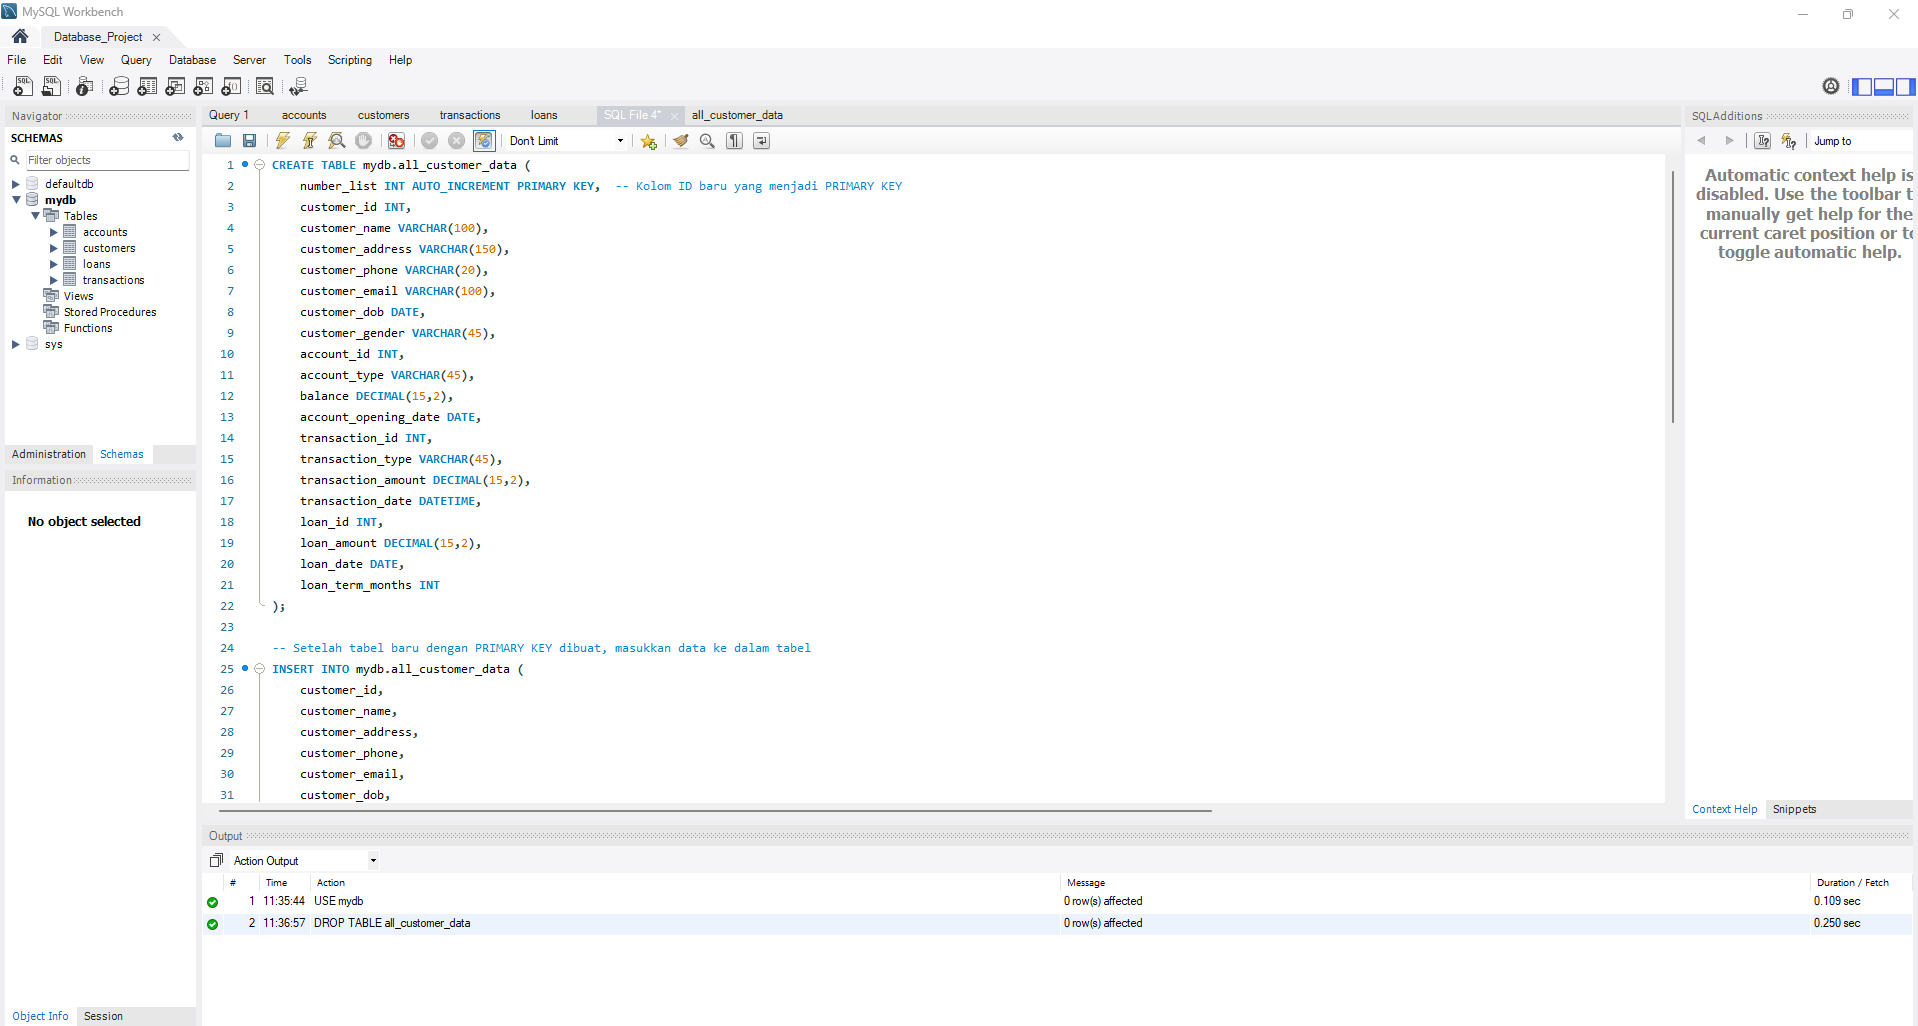

In [ ]:
# This code SQL for combine the tables


# CREATE TABLE mydb.all_customer_data (
#     number_list INT AUTO_INCREMENT PRIMARY KEY,  -- Kolom ID baru yang menjadi PRIMARY KEY
#     customer_id INT,
#     customer_name VARCHAR(100),
#     customer_address VARCHAR(150),
#     customer_phone VARCHAR(20),
#     customer_email VARCHAR(100),
#     customer_dob DATE,
#     customer_gender VARCHAR(45),
#     account_id INT,
#     account_type VARCHAR(45),
#     balance DECIMAL(15,2),
#     account_opening_date DATE,
#     transaction_id INT,
#     transaction_type VARCHAR(45),
#     transaction_amount DECIMAL(15,2),
#     transaction_date DATETIME,
#     loan_id INT,
#     loan_amount DECIMAL(15,2),
#     loan_date DATE,
#     loan_term_months INT
# );

# -- Setelah tabel baru dengan PRIMARY KEY dibuat, masukkan data ke dalam tabel
# INSERT INTO mydb.all_customer_data (
#     customer_id,
#     customer_name,
#     customer_address,
#     customer_phone,
#     customer_email,
#     customer_dob,
#     customer_gender,
#     account_id,
#     account_type,
#     balance,
#     account_opening_date,
#     transaction_id,
#     transaction_type,
#     transaction_amount,
#     transaction_date,
#     loan_id,
#     loan_amount,
#     loan_date,
#     loan_term_months
# )
# SELECT
#     c.customer_id,
#     c.name AS customer_name,
#     c.address AS customer_address,
#     c.phone_number AS customer_phone,
#     c.email AS customer_email,
#     c.date_of_birth AS customer_dob,
#     c.gender AS customer_gender,
#     a.account_id,
#     a.account_type,
#     a.balance,
#     a.opening_date AS account_opening_date,
#     t.transaction_id,
#     t.transaction_type,
#     t.amount AS transaction_amount,
#     t.transaction_date,
#     l.loan_id,
#     l.loan_amount,
#     l.loan_date,
#     l.loan_term_months
# FROM
#     customers c
# LEFT JOIN
#     accounts a ON c.customer_id = a.customer_id
# LEFT JOIN
#     transactions t ON a.account_id = t.account_id
# LEFT JOIN
#     loans l ON c.customer_id = l.customer_id;

# CONNECTIONA TO DATABASE PART 2

In [ ]:
# Connection To Database
conn = mysql.connector.connect(
    host="mysql-2ab13dd0-project-handoyo.e.aivencloud.com",
    port=24451,
    user="avnadmin",
    password="AVNS_qkTfZI7GsIVTlxjvNrq",
    database="mydb"
)
cursor = conn.cursor()

## VIEW THE ENTIRE TABLE PART 2

In [ ]:
# Run the result of database
cursor.execute("SHOW TABLES")
tables = cursor.fetchall()

# Wacth the tables in database
for table in tables:
    print(table[0])

accounts
all_customer_data
customers
loans
transactions


# TRANSFER TABLES COMBINING IN DATABASE TO VARIABLES

In [ ]:
# Ensure there are tables found
if tables:
    # Assign table names to variables
    table_name_com = tables[1][0]  # Name of the first table

    # Query and store data for table_name_acc
    query_com = f"SELECT * FROM {table_name_com}"
    cursor.execute(query_com)
    data_com = cursor.fetchall()
    columns_com = [desc[0] for desc in cursor.description]
    data_com = pd.DataFrame(data_com, columns=columns_com)

else:
    print("No tables were found in the database.")

## TABLE COMBINING

In [ ]:
data_com

,number_list,customer_id,customer_name,customer_address,customer_phone,customer_email,customer_dob,customer_gender,account_id,account_type,balance,account_opening_date,transaction_id,transaction_type,transaction_amount,transaction_date,loan_id,loan_amount,loan_date,loan_term_months
0,1,1,"Dr. Jessica Wibisono, S.Sos","Gang Gedebage Selatan No. 6, Yogyakarta",624410115536,mayasariatma@example.org,2001-02-18,Female,1450,Fixed Deposit Account,602327446.44,2023-04-19,2068.0,Deposit,54733525.00,2023-09-14 04:25:40,1923.0,7810110.34,2023-06-27,14.0
1,2,1,"Dr. Jessica Wibisono, S.Sos","Gang Gedebage Selatan No. 6, Yogyakarta",624410115536,mayasariatma@example.org,2001-02-18,Female,1450,Fixed Deposit Account,602327446.44,2023-04-19,2426.0,Deposit,9199637.45,2023-06-04 09:08:17,1923.0,7810110.34,2023-06-27,14.0
2,3,1,"Dr. Jessica Wibisono, S.Sos","Gang Gedebage Selatan No. 6, Yogyakarta",624410115536,mayasariatma@example.org,2001-02-18,Female,1450,Fixed Deposit Account,602327446.44,2023-04-19,2745.0,Withdrawal,70930389.04,2023-06-26 22:20:43,1923.0,7810110.34,2023-06-27,14.0
3,4,1,"Dr. Jessica Wibisono, S.Sos","Gang Gedebage Selatan No. 6, Yogyakarta",624410115536,mayasariatma@example.org,2001-02-18,Female,1451,Fixed Deposit Account,618907293.10,2024-11-21,NaN,None,None,NaT,1923.0,7810110.34,2023-06-27,14.0
4,5,1,"Dr. Jessica Wibisono, S.Sos","Gang Gedebage Selatan No. 6, Yogyakarta",624410115536,mayasariatma@example.org,2001-02-18,Female,1452,Current Account,732295374.56,2024-03-13,NaN,None,None,NaT,1923.0,7810110.34,2023-06-27,14.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7383,7384,1499,Ani Simbolon,"Gg. Cikutra Barat No. 1, Yogyakarta",62183080794,darijan99@example.net,2005-01-06,Male,458,Fixed Deposit Account,457032744.38,2023-12-01,1994.0,Deposit,12606345.12,2023-12-07 22:41:46,1634.0,3081353.32,2023-12-24,21.0
7384,7385,1499,Ani Simbolon,"Gg. Cikutra Barat No. 1, Yogyakarta",62183080794,darijan99@example.net,2005-01-06,Male,459,Savings Account,670710652.66,2024-04-06,NaN,None,None,NaT,1634.0,3081353.32,2023-12-24,21.0
7385,7386,1500,Praba Pratama,"Jalan Wonoayu No. 2, Yogyakarta",627883418235,michelle42@example.org,1959-02-27,Male,3517,Current Account,460309908.33,2024-07-23,NaN,None,None,NaT,2533.0,6737843.10,2023-11-06,47.0
7386,7387,1500,Praba Pratama,"Jalan Wonoayu No. 2, Yogyakarta",627883418235,michelle42@example.org,1959-02-27,Male,3518,Current Account,544436740.51,2023-02-18,2110.0,Deposit,1820835.36,2023-03-18 05:03:25,2533.0,6737843.10,2023-11-06,47.0


# DATA UNDERSTANDING

# EXPLORATORY DATA ANALYSIS (EDA) PART 1

## DATA DICTIONARY EXPLANATION


| Column                  | Description                                                                 |
|-------------------------|-----------------------------------------------------------------------------|
| **number_list**          | A unique ID that serves as the *Primary Key* and automatically increments with each new entry. |
| **customer_id**          | A unique ID for each customer used to identify them individually.           |
| **customer_name**        | The full name of the customer.                                              |
| **customer_address**     | The full address of the customer.                                           |
| **customer_phone**       | The customer's phone number.                                                |
| **customer_email**       | The customer's email address.                                               |
| **customer_dob**         | The customer's date of birth.                                              |
| **customer_gender**      | The customer's gender.                                                     |
| **account_id**           | A unique ID for each customer's account.                                    |
| **account_type**         | The type of the account (e.g., Savings, Checking, etc.).                    |
| **balance**              | The balance in the customer's account.                                      |
| **account_opening_date** | The date when the customer's account was opened.                            |
| **transaction_id**       | A unique ID for each transaction that occurs in the customer's account.    |
| **transaction_type**     | The type of transaction (e.g., deposit, withdrawal, transfer).              |
| **transaction_amount**   | The amount of money involved in the transaction.                            |
| **transaction_date**     | The date and time when the transaction occurred.                            |
| **loan_id**              | A unique ID for each loan taken by the customer.                            |
| **loan_amount**          | The amount of money borrowed by the customer.                               |
| **loan_date**            | The date when the loan was granted to the customer.                         |
| **loan_term_months**     | The loan term duration in months.                                           |


## TYPE DATA

In [ ]:
data_com.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7388 entries, 0 to 7387
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   number_list           7388 non-null   int64         
 1   customer_id           7388 non-null   int64         
 2   customer_name         7388 non-null   object        
 3   customer_address      7388 non-null   object        
 4   customer_phone        7388 non-null   object        
 5   customer_email        7388 non-null   object        
 6   customer_dob          7388 non-null   object        
 7   customer_gender       7388 non-null   object        
 8   account_id            7388 non-null   int64         
 9   account_type          7388 non-null   object        
 10  balance               7388 non-null   object        
 11  account_opening_date  7388 non-null   object        
 12  transaction_id        4861 non-null   float64       
 13  transaction_type  

## MISSING VALUE

In [ ]:
data_com.isna().sum()

,0
number_list,0
customer_id,0
customer_name,0
customer_address,0
customer_phone,0
customer_email,0
customer_dob,0
customer_gender,0
account_id,0
account_type,0


In [ ]:
missing = data_com.isnull().sum().rename('Amount').sort_values(ascending = False)

# Change to DataFrame (from series)
missing = pd.DataFrame(missing)
missing

,Amount
transaction_date,2527
transaction_amount,2527
transaction_type,2527
transaction_id,2527
loan_term_months,519
loan_date,519
loan_amount,519
loan_id,519
customer_id,0
account_opening_date,0


In [ ]:
missing['Percentage'] = round(missing['Amount']  / len(data_com) * 100,2)
missing

,Amount,Percentage
transaction_date,2527,34.20
transaction_amount,2527,34.20
transaction_type,2527,34.20
transaction_id,2527,34.20
loan_term_months,519,7.02
loan_date,519,7.02
loan_amount,519,7.02
loan_id,519,7.02
customer_id,0,0.00
account_opening_date,0,0.00


In [ ]:
data_com[data_com.isna().any(axis = 1)]

,number_list,customer_id,customer_name,customer_address,customer_phone,customer_email,customer_dob,customer_gender,account_id,account_type,balance,account_opening_date,transaction_id,transaction_type,transaction_amount,transaction_date,loan_id,loan_amount,loan_date,loan_term_months
3,4,1,"Dr. Jessica Wibisono, S.Sos","Gang Gedebage Selatan No. 6, Yogyakarta",624410115536,mayasariatma@example.org,2001-02-18,Female,1451,Fixed Deposit Account,618907293.10,2024-11-21,NaN,None,None,NaT,1923.0,7810110.34,2023-06-27,14.0
4,5,1,"Dr. Jessica Wibisono, S.Sos","Gang Gedebage Selatan No. 6, Yogyakarta",624410115536,mayasariatma@example.org,2001-02-18,Female,1452,Current Account,732295374.56,2024-03-13,NaN,None,None,NaT,1923.0,7810110.34,2023-06-27,14.0
8,9,2,Emil Simanjuntak,"Jalan Cikutra Barat No. 9, Yogyakarta",628441266686,irawanokta@example.org,1951-06-06,Male,524,Current Account,187860728.01,2024-12-14,NaN,None,None,NaT,1649.0,5262049.55,2023-12-25,48.0
11,12,3,"Maryanto Nuraini, S.E.I","Gang Dr. Djunjunan No. 13, Yogyakarta",62441791659,opheliakuswoyo@example.net,1949-10-21,Female,2795,Fixed Deposit Account,579068924.45,2024-03-28,NaN,None,None,NaT,2316.0,3447602.85,2023-03-16,24.0
12,13,3,"Maryanto Nuraini, S.E.I","Gang Dr. Djunjunan No. 13, Yogyakarta",62441791659,opheliakuswoyo@example.net,1949-10-21,Female,2796,Fixed Deposit Account,142980420.24,2024-10-12,NaN,None,None,NaT,2316.0,3447602.85,2023-03-16,24.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7378,7379,1498,Damar Uyainah,"Gg. Asia Afrika No. 268, Yogyakarta",627366167186,habibigilda@example.org,2005-06-04,Male,1690,Savings Account,588275842.48,2024-07-16,NaN,None,None,NaT,1993.0,4629286.65,2023-10-24,37.0
7382,7383,1499,Ani Simbolon,"Gg. Cikutra Barat No. 1, Yogyakarta",62183080794,darijan99@example.net,2005-01-06,Male,457,Current Account,644651868.88,2024-09-20,NaN,None,None,NaT,1634.0,3081353.32,2023-12-24,21.0
7384,7385,1499,Ani Simbolon,"Gg. Cikutra Barat No. 1, Yogyakarta",62183080794,darijan99@example.net,2005-01-06,Male,459,Savings Account,670710652.66,2024-04-06,NaN,None,None,NaT,1634.0,3081353.32,2023-12-24,21.0
7385,7386,1500,Praba Pratama,"Jalan Wonoayu No. 2, Yogyakarta",627883418235,michelle42@example.org,1959-02-27,Male,3517,Current Account,460309908.33,2024-07-23,NaN,None,None,NaT,2533.0,6737843.10,2023-11-06,47.0


In [ ]:
data_com[data_com['customer_id'] == 1]

,number_list,customer_id,customer_name,customer_address,customer_phone,customer_email,customer_dob,customer_gender,account_id,account_type,balance,account_opening_date,transaction_id,transaction_type,transaction_amount,transaction_date,loan_id,loan_amount,loan_date,loan_term_months
0,1,1,"Dr. Jessica Wibisono, S.Sos","Gang Gedebage Selatan No. 6, Yogyakarta",624410115536,mayasariatma@example.org,2001-02-18,Female,1450,Fixed Deposit Account,602327446.44,2023-04-19,2068.0,Deposit,54733525.00,2023-09-14 04:25:40,1923.0,7810110.34,2023-06-27,14.0
1,2,1,"Dr. Jessica Wibisono, S.Sos","Gang Gedebage Selatan No. 6, Yogyakarta",624410115536,mayasariatma@example.org,2001-02-18,Female,1450,Fixed Deposit Account,602327446.44,2023-04-19,2426.0,Deposit,9199637.45,2023-06-04 09:08:17,1923.0,7810110.34,2023-06-27,14.0
2,3,1,"Dr. Jessica Wibisono, S.Sos","Gang Gedebage Selatan No. 6, Yogyakarta",624410115536,mayasariatma@example.org,2001-02-18,Female,1450,Fixed Deposit Account,602327446.44,2023-04-19,2745.0,Withdrawal,70930389.04,2023-06-26 22:20:43,1923.0,7810110.34,2023-06-27,14.0
3,4,1,"Dr. Jessica Wibisono, S.Sos","Gang Gedebage Selatan No. 6, Yogyakarta",624410115536,mayasariatma@example.org,2001-02-18,Female,1451,Fixed Deposit Account,618907293.10,2024-11-21,NaN,None,None,NaT,1923.0,7810110.34,2023-06-27,14.0
4,5,1,"Dr. Jessica Wibisono, S.Sos","Gang Gedebage Selatan No. 6, Yogyakarta",624410115536,mayasariatma@example.org,2001-02-18,Female,1452,Current Account,732295374.56,2024-03-13,NaN,None,None,NaT,1923.0,7810110.34,2023-06-27,14.0


## DUPLICATED DATA

In [ ]:
data_com.duplicated().sum()

0

## NUMERIC VARIABLE

### DESCRIPTIVE STATISTICS

In [ ]:
data_com.describe()

,number_list,customer_id,account_id,transaction_id,transaction_date,loan_id,loan_term_months
count,7388.000000,7388.000000,7388.000000,4861.000000,4861,6869.000000,6869.000000
mean,3694.500000,745.588522,2253.019762,2431.000000,2023-10-01 20:40:48.495577088,2161.894162,35.922259
min,1.000000,1.000000,1.000000,1.000000,2023-01-02 05:31:52,1500.000000,12.000000
25%,1847.750000,371.000000,1127.000000,1216.000000,2023-08-12 16:25:04,1828.000000,24.000000
50%,3694.500000,746.000000,2245.000000,2431.000000,2023-10-27 20:53:49,2159.000000,36.000000
75%,5541.250000,1118.000000,3388.000000,3646.000000,2023-12-08 04:16:24,2497.000000,48.000000
max,7388.000000,1500.000000,4500.000000,4861.000000,2023-12-31 23:55:47,2826.000000,60.000000
std,2132.876227,431.741561,1303.334549,1403.394159,NaN,384.320367,14.017755


### STATISTICAL TEST

Because NaN data or Missing Data cannot be run in Statistical Tests, Missing Data is temporarily deleted.

In [ ]:
data_com_copy= data_com.copy()

data_com_copy = data_com_copy.dropna()

In [ ]:
numeric_columns = data_com_copy.select_dtypes(include=[np.number]).columns

I chose to use a variety of statistical test methods to test the normality of the data to get a more complete picture. Each statistical test, such as Shapiro-Wilk, Anderson-Darling, and Kolmogorov-Smirnov, has its own advantages and disadvantages, depending on the characteristics of the sample and the purpose of the analysis. By combining these methods, I can ensure that the results of the normality test are more robust and reduce the potential for errors in interpretation. This approach provides greater accuracy in choosing the right statistical model or transformation technique for further analysis.

In [ ]:
# Function to test normality
def normality_tests(data):
    results = {}

    # Kolmogorov-Smirnov Test
    ks_stat, ks_p_value = stats.kstest(data, 'norm')
    results['Kolmogorov-Smirnov'] = (ks_stat, ks_p_value)

    # Liliefors Test
    lilliefors_stat, lilliefors_p_value = lilliefors(data)
    results['Liliefors Test'] = (lilliefors_stat, lilliefors_p_value)

    # Shapiro-Wilk Test
    sw_stat, sw_p_value = stats.shapiro(data)
    results['Shapiro-Wilk'] = (sw_stat, sw_p_value)

    # D'Agostino and Pearson's Test
    dagostino_stat, dagostino_p_value = stats.normaltest(data)
    results['D\'Agostino Pearson'] = (dagostino_stat, dagostino_p_value)

    return results

# Function to determine normality based on p-value
def check_normality(p_value):
    if p_value > 0.05:
        return "Normal"
    else:
        return "Not Normal"

# Loop to test each numeric column
for column in numeric_columns:
    print(f"RESULTS FOR {column}:")
    results = normality_tests(data_com_copy[column])  # Removing missing values
    for test, (stat, p_value) in results.items():
        normality_status = check_normality(p_value)
        print(f"{test} - Statistic: {stat:.4f}, p-value: {p_value:.4f} -> {normality_status}")
    print("\n")

RESULTS FOR number_list:
Kolmogorov-Smirnov - Statistic: 0.9994, p-value: 0.0000 -> Not Normal
Liliefors Test - Statistic: 0.0596, p-value: 0.0010 -> Not Normal
Shapiro-Wilk - Statistic: 0.9556, p-value: 0.0000 -> Not Normal
D'Agostino Pearson - Statistic: 3949.8072, p-value: 0.0000 -> Not Normal


RESULTS FOR customer_id:
Kolmogorov-Smirnov - Statistic: 0.9983, p-value: 0.0000 -> Not Normal
Liliefors Test - Statistic: 0.0624, p-value: 0.0010 -> Not Normal
Shapiro-Wilk - Statistic: 0.9555, p-value: 0.0000 -> Not Normal
D'Agostino Pearson - Statistic: 3951.5521, p-value: 0.0000 -> Not Normal


RESULTS FOR account_id:
Kolmogorov-Smirnov - Statistic: 0.9984, p-value: 0.0000 -> Not Normal
Liliefors Test - Statistic: 0.0677, p-value: 0.0010 -> Not Normal
Shapiro-Wilk - Statistic: 0.9528, p-value: 0.0000 -> Not Normal
D'Agostino Pearson - Statistic: 5250.5021, p-value: 0.0000 -> Not Normal


RESULTS FOR transaction_id:
Kolmogorov-Smirnov - Statistic: 0.9994, p-value: 0.0000 -> Not Normal
Lil

### OUTLIERS

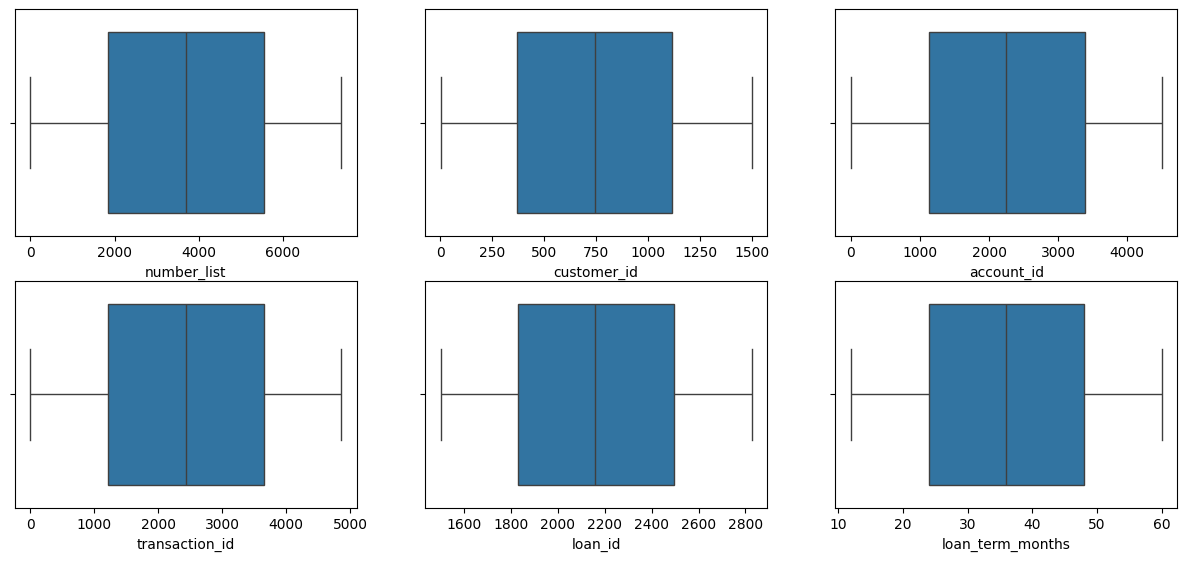

In [ ]:
# Select numeric columns
numeric = data_com.select_dtypes(include = 'number')  # float and int

plt.figure(figsize = (15,10))  # (rows, columns)
position = 1
for column in numeric.columns:
    plt.subplot(3, 3, position)  # (rows, columns, position)
    sns.boxplot(x = data_com[column])
    position += 1

# Print the plot
plt.show()

### CORRELATION

<Axes: >

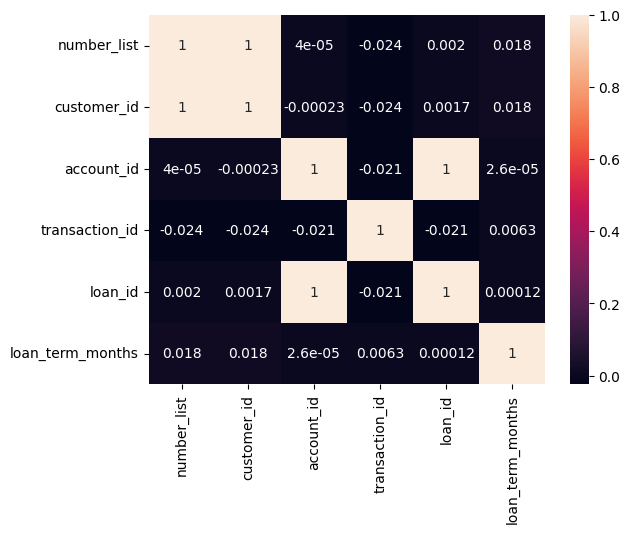

In [ ]:
sns.heatmap(numeric.corr(), annot = True)

## CATEGORY VARIABLE

### DESCRIPTIVE STATISTICS

In [ ]:
data_com.describe(exclude = 'number')

,customer_name,customer_address,customer_phone,customer_email,customer_dob,customer_gender,account_type,balance,account_opening_date,transaction_type,transaction_amount,transaction_date,loan_amount,loan_date
count,7388,7388,7388,7388,7388,7388,7388,7388,7388,4861,4861,4861,6869,6869
unique,1493,1459,1500,1497,1449,2,3,4500,714,3,4861,NaN,1327,283
top,Suci Nasyidah,"Gg. Laswi No. 6, Yogyakarta",621570087096,zsuwarno@example.net,1970-01-21,Male,Current Account,249087803.92,2023-11-21,Deposit,54733525.00,NaN,9599011.18,2024-01-01
freq,19,22,14,14,20,3828,2502,9,41,2150,1,NaN,14,117
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2023-10-01 20:40:48.495577088,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2023-01-02 05:31:52,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2023-08-12 16:25:04,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2023-10-27 20:53:49,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2023-12-08 04:16:24,NaN,NaN
max,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2023-12-31 23:55:47,NaN,NaN


### UNIQUE VALUES

In [ ]:
# Select all categorical columns
categorical = df.select_dtypes(include = 'object')

# Count unique values for each variable
categorical.nunique()

,0
name,1493
address,1459
phone_number,1500
email,1497
date_of_birth,1449
gender,2


## CONCLUSION DATA UNDERSTANDING

1. MISSING VALUES

  -  Missing values ​​data shows that columns related to transactions and loans, such as **transaction_date, transaction_amount, transaction_type, and transaction_id**, **have many missing values**, each with **2527 entries**. This indicates that data related to transactions and loans have not been fully recorded or processed, which can hinder financial analysis and monitoring of loan status. Meanwhile, columns related to customer information, such as customer_id, customer_name, balance, and several other attributes, have no missing values, indicating that customer data is complete and can be used for further analysis. Columns related to loans, such as **loan_term_months, loan_date, loan_amount**, and **loan_id**, **have 519 missing values**, which may indicate that not all customers have loans or that loan data has not been fully recorded. Therefore, it is important to verify and improve the transaction and loan recording process so that all necessary data is available for more accurate and comprehensive analysis.

2. NO DUPLICATE DATA

3. DATA IS NOT DISTRIBUTED NORMALLY

  -  The results of the normality test for columns such as number_list, customer_id, account_id, transaction_id, loan_id, and loan_term_months show that the data in these columns are **not normally distributed**. All statistical tests used, including the Kolmogorov-Smirnov, Liliefors Test, Shapiro-Wilk, and D'Agostino Pearson, produce very small p-values ​​(all < 0.05), which means that the distribution of data in these columns is very different from the normal distribution. Thus, the data in these columns cannot be assumed to follow a normal distribution and requires an appropriate analysis approach, such as the use of non-parametric tests.

4. CHANGE TYPE DATA

  -  Several columns in the dataset need to have their data types changed for more effective analysis. **The balance, transaction_amount, and loan_amount** columns should be numeric **(float64)** in order to perform financial calculations, since they currently have an object type. **The customer_dob, account_opening_date, and loan_date columns** that contain dates also need to be changed to **datetime64[ns]** in order to be used in time analysis. In addition, **the transaction_id and loan_id** columns, which are currently **float64**, are more appropriate to be changed to **int64**, since both only function as IDs without decimal values. These data type changes will improve efficiency and accuracy in analyzing the dataset.

# DATA CLEANING

Since our discussion is on bank loans, we will determine which columns to remove and which to retain.

1. During the Missing Values cleaning process, rows with consecutive Missing Values in columns ranging from transaction_id, transaction_type, transaction_amount, transaction_date, loan_id, loan_amount, loan_date, to loan_term_months will be deleted. Additionally, rows with Missing Values in the columns loan_id, loan_amount, loan_date, to loan_term_months will also be removed.

2. Some columns in the dataset need their data types updated for better analysis. The balance, transaction_amount, and loan_amount columns should be changed to float64 for financial calculations, as they are currently in object format. The customer_dob, account_opening_date, and loan_date columns should be changed to datetime64[ns] for time-based analysis. Additionally, the transaction_id and loan_id columns should be converted to int64 since they are just IDs and don’t need decimal values. These changes will enhance analysis efficiency and accuracy.

## INFORMATION ROWS AND COLUMNS

In [ ]:
data_com

,number_list,customer_id,customer_name,customer_address,customer_phone,customer_email,customer_dob,customer_gender,account_id,account_type,balance,account_opening_date,transaction_id,transaction_type,transaction_amount,transaction_date,loan_id,loan_amount,loan_date,loan_term_months
0,1,1,"Dr. Jessica Wibisono, S.Sos","Gang Gedebage Selatan No. 6, Yogyakarta",624410115536,mayasariatma@example.org,2001-02-18,Female,1450,Fixed Deposit Account,602327446.44,2023-04-19,2068.0,Deposit,54733525.00,2023-09-14 04:25:40,1923.0,7810110.34,2023-06-27,14.0
1,2,1,"Dr. Jessica Wibisono, S.Sos","Gang Gedebage Selatan No. 6, Yogyakarta",624410115536,mayasariatma@example.org,2001-02-18,Female,1450,Fixed Deposit Account,602327446.44,2023-04-19,2426.0,Deposit,9199637.45,2023-06-04 09:08:17,1923.0,7810110.34,2023-06-27,14.0
2,3,1,"Dr. Jessica Wibisono, S.Sos","Gang Gedebage Selatan No. 6, Yogyakarta",624410115536,mayasariatma@example.org,2001-02-18,Female,1450,Fixed Deposit Account,602327446.44,2023-04-19,2745.0,Withdrawal,70930389.04,2023-06-26 22:20:43,1923.0,7810110.34,2023-06-27,14.0
3,4,1,"Dr. Jessica Wibisono, S.Sos","Gang Gedebage Selatan No. 6, Yogyakarta",624410115536,mayasariatma@example.org,2001-02-18,Female,1451,Fixed Deposit Account,618907293.10,2024-11-21,NaN,None,None,NaT,1923.0,7810110.34,2023-06-27,14.0
4,5,1,"Dr. Jessica Wibisono, S.Sos","Gang Gedebage Selatan No. 6, Yogyakarta",624410115536,mayasariatma@example.org,2001-02-18,Female,1452,Current Account,732295374.56,2024-03-13,NaN,None,None,NaT,1923.0,7810110.34,2023-06-27,14.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7383,7384,1499,Ani Simbolon,"Gg. Cikutra Barat No. 1, Yogyakarta",62183080794,darijan99@example.net,2005-01-06,Male,458,Fixed Deposit Account,457032744.38,2023-12-01,1994.0,Deposit,12606345.12,2023-12-07 22:41:46,1634.0,3081353.32,2023-12-24,21.0
7384,7385,1499,Ani Simbolon,"Gg. Cikutra Barat No. 1, Yogyakarta",62183080794,darijan99@example.net,2005-01-06,Male,459,Savings Account,670710652.66,2024-04-06,NaN,None,None,NaT,1634.0,3081353.32,2023-12-24,21.0
7385,7386,1500,Praba Pratama,"Jalan Wonoayu No. 2, Yogyakarta",627883418235,michelle42@example.org,1959-02-27,Male,3517,Current Account,460309908.33,2024-07-23,NaN,None,None,NaT,2533.0,6737843.10,2023-11-06,47.0
7386,7387,1500,Praba Pratama,"Jalan Wonoayu No. 2, Yogyakarta",627883418235,michelle42@example.org,1959-02-27,Male,3518,Current Account,544436740.51,2023-02-18,2110.0,Deposit,1820835.36,2023-03-18 05:03:25,2533.0,6737843.10,2023-11-06,47.0


Data Have 7388 rows × 20 columns

## CLEANING MISSING VALUES

### CLEANING OF ROWS transaction_id until loan_term_months HAVE MISSING VALUES

In [ ]:
# Search Missing Values for All Columns Choosing
data_com[data_com[['transaction_id', 'transaction_type', 'transaction_amount', 'transaction_date',
                      'loan_id', 'loan_amount', 'loan_date', 'loan_term_months']].isna().all(axis=1)]

,number_list,customer_id,customer_name,customer_address,customer_phone,customer_email,customer_dob,customer_gender,account_id,account_type,balance,account_opening_date,transaction_id,transaction_type,transaction_amount,transaction_date,loan_id,loan_amount,loan_date,loan_term_months
55,56,12,"Asmuni Pratama, S.Pt","Jl. Pasteur No. 82, Yogyakarta",629769857164,padmasariyosef@example.com,1951-10-01,Female,3676,Savings Account,489118328.93,2024-10-13,NaN,None,None,NaT,NaN,None,None,NaN
56,57,12,"Asmuni Pratama, S.Pt","Jl. Pasteur No. 82, Yogyakarta",629769857164,padmasariyosef@example.com,1951-10-01,Female,3677,Savings Account,266327067.67,2024-11-04,NaN,None,None,NaT,NaN,None,None,NaN
57,58,12,"Asmuni Pratama, S.Pt","Jl. Pasteur No. 82, Yogyakarta",629769857164,padmasariyosef@example.com,1951-10-01,Female,3678,Savings Account,253697942.65,2024-12-17,NaN,None,None,NaT,NaN,None,None,NaN
84,85,19,Azalea Wahyuni,"Gg. Siliwangi No. 64, Yogyakarta",629445745374,triyanti@example.org,1986-12-09,Male,3013,Fixed Deposit Account,531548529.46,2024-12-11,NaN,None,None,NaT,NaN,None,None,NaN
85,86,19,Azalea Wahyuni,"Gg. Siliwangi No. 64, Yogyakarta",629445745374,triyanti@example.org,1986-12-09,Male,3014,Fixed Deposit Account,185097914.30,2024-08-30,NaN,None,None,NaT,NaN,None,None,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7360,7361,1494,"R. Yuliana Prabowo, S.Farm","Gg. Rajawali Barat No. 77, Yogyakarta",626484046228,teguhwinarno@example.com,1973-11-16,Male,350,Current Account,437014828.57,2024-01-27,NaN,None,None,NaT,NaN,None,None,NaN
7361,7362,1494,"R. Yuliana Prabowo, S.Farm","Gg. Rajawali Barat No. 77, Yogyakarta",626484046228,teguhwinarno@example.com,1973-11-16,Male,351,Current Account,882658256.78,2024-01-22,NaN,None,None,NaT,NaN,None,None,NaN
7367,7368,1496,Novi Januar,"Gang W.R. Supratman No. 82, Yogyakarta",626912677843,atmaja06@example.org,1954-12-25,Female,265,Savings Account,615313244.26,2024-12-18,NaN,None,None,NaT,NaN,None,None,NaN
7368,7369,1496,Novi Januar,"Gang W.R. Supratman No. 82, Yogyakarta",626912677843,atmaja06@example.org,1954-12-25,Female,266,Savings Account,271705895.04,2024-03-27,NaN,None,None,NaT,NaN,None,None,NaN


In [ ]:
# Drop rows with all missing values in specified columns, apply changes directly to the DataFrame
data_com.dropna(subset=['transaction_id', 'transaction_type', 'transaction_amount', 'transaction_date',
                        'loan_id', 'loan_amount', 'loan_date', 'loan_term_months'],
                how='all', inplace=True)

### CLEANING OF ROWS loan_id until loan_term_months HAVE MISSING VALUES

In [ ]:
data_com[data_com[['loan_id', 'loan_amount', 'loan_date', 'loan_term_months']].isna().all(axis=1)]

,number_list,customer_id,customer_name,customer_address,customer_phone,customer_email,customer_dob,customer_gender,account_id,account_type,balance,account_opening_date,transaction_id,transaction_type,transaction_amount,transaction_date,loan_id,loan_amount,loan_date,loan_term_months


## CHANGE TYPE DATA

## customer_dob

In [ ]:
data_com['customer_dob'] = pd.to_datetime(data_com['customer_dob'])

## balance

In [ ]:
data_com['balance'] = pd.to_numeric(data_com['balance'], errors='coerce').astype(float)

## account_opening_date

In [ ]:
data_com['account_opening_date'] = pd.to_datetime(data_com['account_opening_date'])

## transaction_id

In [ ]:
data_com['transaction_id'] = data_com['transaction_id'].fillna(0).astype(int)

## loan_id

In [ ]:
data_com['loan_id'] = data_com['loan_id'].fillna(0).astype(int)

## transaction_amount

In [ ]:
data_com['transaction_amount'] = pd.to_numeric(data_com['transaction_amount'], errors='coerce').astype(float)

## loan_amount

In [ ]:
data_com['loan_amount'] = pd.to_numeric(data_com['loan_amount'], errors='coerce').astype(float)

## loan_date

In [ ]:
data_com['loan_date'] = pd.to_datetime(data_com['loan_date'])

## CHECK TYPE DATA

In [ ]:
data_com.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6869 entries, 0 to 7387
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   number_list           6869 non-null   int64         
 1   customer_id           6869 non-null   int64         
 2   customer_name         6869 non-null   object        
 3   customer_address      6869 non-null   object        
 4   customer_phone        6869 non-null   object        
 5   customer_email        6869 non-null   object        
 6   customer_dob          6869 non-null   datetime64[ns]
 7   customer_gender       6869 non-null   object        
 8   account_id            6869 non-null   int64         
 9   account_type          6869 non-null   object        
 10  balance               6869 non-null   float64       
 11  account_opening_date  6869 non-null   datetime64[ns]
 12  transaction_id        6869 non-null   int64         
 13  transaction_type      4

# EXPLORATORY DATA ANALYSIS (EDA) PART 2

The discussion about account types and their relationship with various financial aspects, such as balance, transaction type, transaction amount, loan amount, and loan term, is highly relevant for understanding customers' financial patterns comprehensively. Account type reflects the fundamental characteristics of how accounts are utilized by customers, making it a key variable influencing average balances, transaction preferences, and tendencies to utilize loans. By analyzing these relationships, valuable insights can be gained to identify behavioral differences based on account types, optimize financial product offerings, and manage loan risks effectively. This combination of topics sufficiently covers essential interconnected aspects to provide a holistic view of the impact of account types on customers' financial behavior.

## OUTLIERS

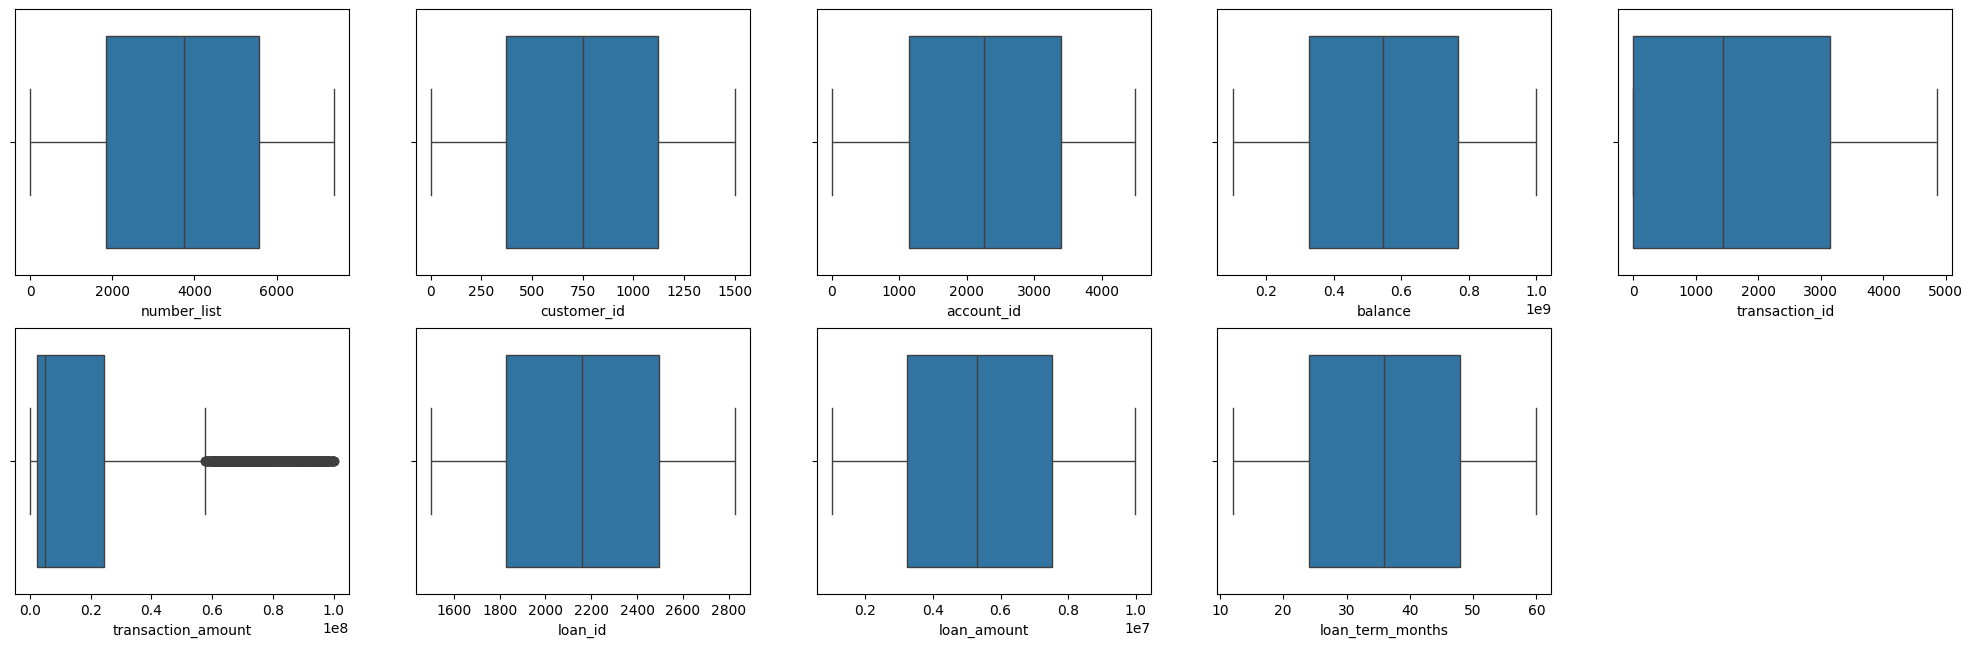

In [ ]:
# Select numeric columns
numeric = data_com.select_dtypes(include = 'number')  # float and int

plt.figure(figsize = (25,20))  # (rows, columns)
position = 1
for column in numeric.columns:
    plt.subplot(5, 5, position)  # (rows, columns, position)
    sns.boxplot(x = data_com[column])
    position += 1

# Print the plot
plt.show()

## CORRELATION

<Axes: >

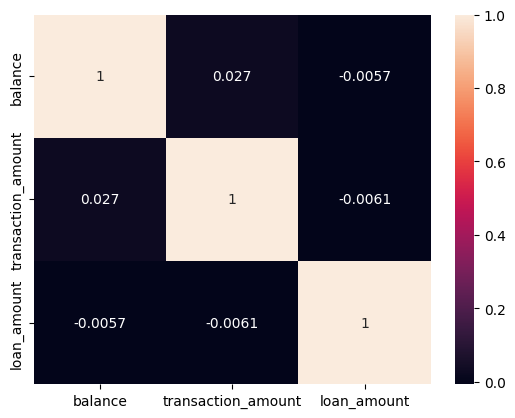

In [ ]:
# Select specific columns
selected_columns = ['balance', 'transaction_amount', 'loan_amount']

# Calculate the correlation matrix for these columns
sns.heatmap(data_com[selected_columns].corr(), annot = True)

## TYPE ACCOUNT

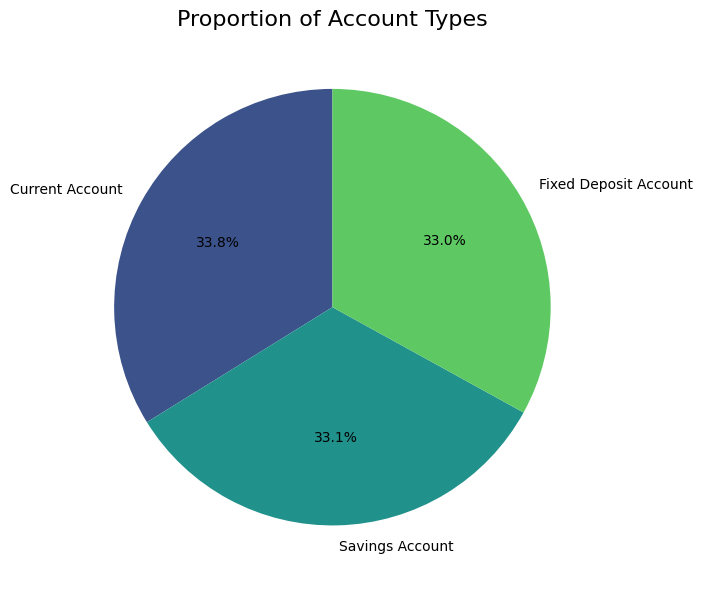

In [ ]:
# Proportion of account types with a pie chart
plt.figure(figsize=(10, 6))

# Calculating value counts for account types
account_counts = data_com['account_type'].value_counts()

# Creating the pie chart
plt.pie(
    account_counts,
    labels=account_counts.index,
    autopct='%1.1f%%',
    startangle=90,
    colors=sns.color_palette('viridis', len(account_counts))  # Adding a color palette
)

# Adding title
plt.title('Proportion of Account Types', fontsize=16)

# Displaying the plot
plt.tight_layout()
plt.show()

In [ ]:
account_counts = account_counts.reset_index()

account_counts.columns = ['account_type', 'Amount']
account_counts

,account_type,Amount
0,Current Account,2324
1,Savings Account,2277
2,Fixed Deposit Account,2268


In [ ]:
account_counts['percentage'] = (account_counts['Amount'] / account_counts['Amount'].sum()) * 100
account_counts

,account_type,Amount,percentage
0,Current Account,2324,33.833163
1,Savings Account,2277,33.148930
2,Fixed Deposit Account,2268,33.017907


The data shows the distribution of account balances based on account type, with three types of accounts listed. The Current Account has a balance of 2324, contributing 33.83% of the total. The Savings Account has a balance of 2277, contributing 33.15%. Finally, the Fixed Deposit Account has a balance of 2268, contributing 33.02%. Each account type has nearly the same proportion of the total, with only slight differences between them.

## TYPE ACCOUNT AND BALANCE

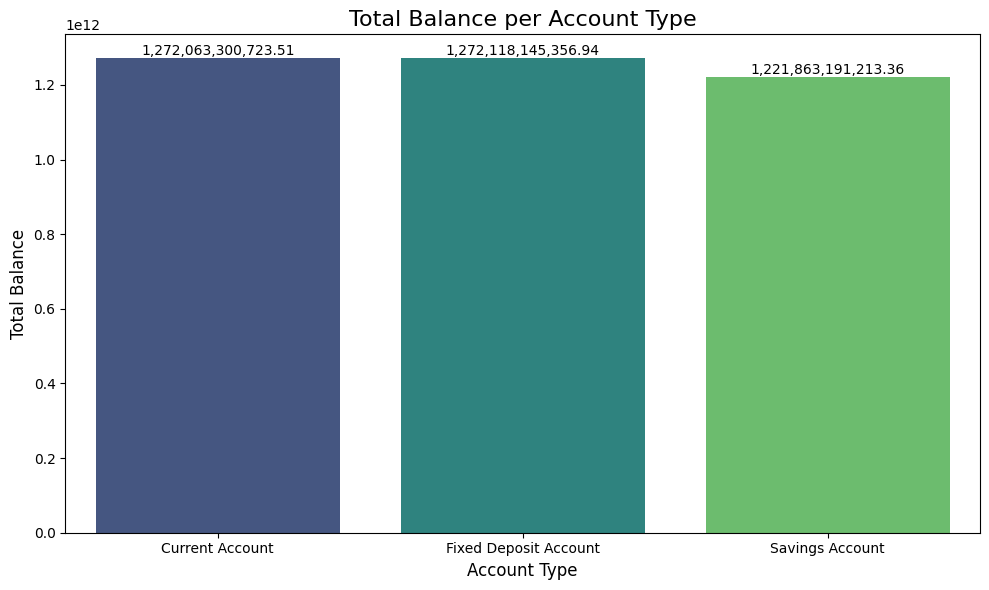

In [ ]:
# Grouping data by account type and summing balances
data_com_taba = data_com.groupby('account_type')['balance'].sum().reset_index()

# Creating a bar chart using Seaborn
plt.figure(figsize=(10, 6))
sns.barplot(data=data_com_taba, x='account_type', y='balance', hue='account_type', dodge=False, palette='viridis', legend=False)

# Adding numerical values on top of each bar
for i in range(len(data_com_taba)):
    plt.text(
        x=i,
        y=data_com_taba['balance'][i],
        s=f"{data_com_taba['balance'][i]:,.2f}",  # Format the number
        ha='center',
        va='bottom',
        fontsize=10,
        color='black'
    )

# Adding visualization elements
plt.title('Total Balance per Account Type', fontsize=16)
plt.xlabel('Account Type', fontsize=12)
plt.ylabel('Total Balance', fontsize=12)
plt.xticks(rotation=0)
plt.tight_layout()

# Displaying the plot
plt.show()

In [ ]:
data_com_taba

,account_type,balance
0,Current Account,1.272063e+12
1,Fixed Deposit Account,1.272118e+12
2,Savings Account,1.221863e+12


The data shows the account balances for three types of accounts. The Current Account has a balance of approximately 1.27 trillion, while the Fixed Deposit Account has a slightly higher balance of around 1.27 trillion as well. The Savings Account has a balance of about 1.22 trillion, which is lower than the other two account types.

## ACCOUNT TYPE AND TRANSACTION TYPE

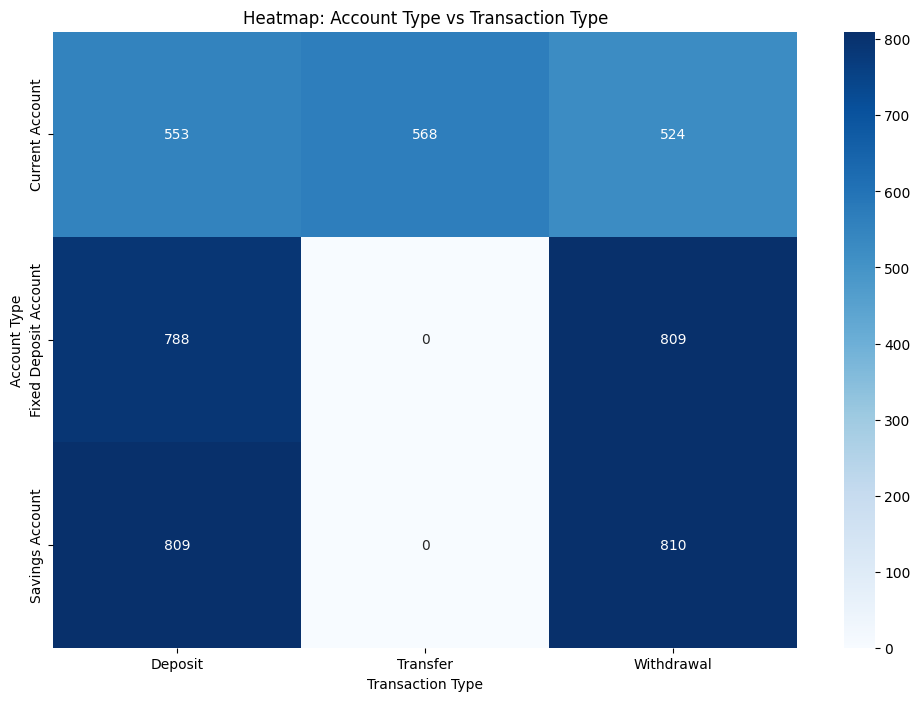

In [ ]:
# Calculate distributions
account_type_counts = data_com['account_type'].value_counts()
transaction_type_counts = data_com['transaction_type'].value_counts()

# Optional: Relationship between account type and transaction type
relation_counts = data_com.groupby(['account_type', 'transaction_type']).size().unstack(fill_value=0)

plt.figure(figsize=(12, 8))
sns.heatmap(relation_counts, annot=True, fmt='d', cmap='Blues')
plt.title('Heatmap: Account Type vs Transaction Type')
plt.xlabel('Transaction Type')
plt.ylabel('Account Type')
plt.show()


In [ ]:
relation_counts

transaction_type,Deposit,Transfer,Withdrawal
account_type,,,
Current Account,553,568,524
Fixed Deposit Account,788,0,809
Savings Account,809,0,810


The data shows the transaction types for three account types. For the Current Account, there were 553 deposits, 568 transfers, and 524 withdrawals. The Fixed Deposit Account had 788 deposits, no transfers, and 809 withdrawals. The Savings Account had 809 deposits, no transfers, and 810 withdrawals.

## TYPE ACCOUNT AND TRANSACTION AMOUNT

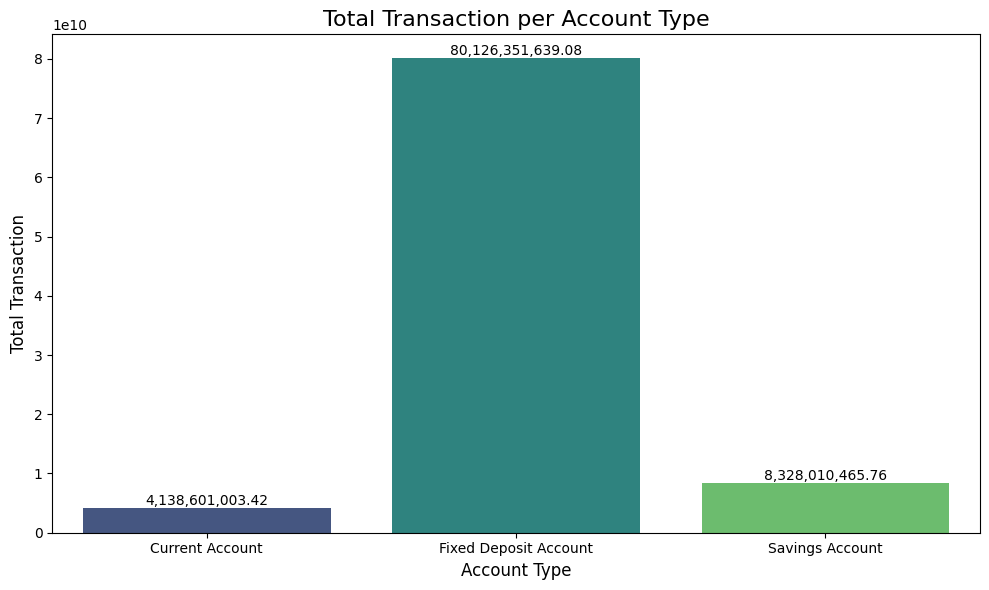

In [ ]:
# Grouping data by account type and summing transaction
data_com_tata = data_com.groupby('account_type')['transaction_amount'].sum().reset_index()

# Creating a bar chart using Seaborn
plt.figure(figsize=(10, 6))
sns.barplot(data=data_com_tata, x='account_type', y='transaction_amount', hue='account_type', dodge=False, palette='viridis', legend=False)

# Adding numerical values on top of each bar
for i in range(len(data_com_tata)):
    plt.text(
        x=i,
        y=data_com_tata['transaction_amount'][i],
        s=f"{data_com_tata['transaction_amount'][i]:,.2f}",  # Format the number
        ha='center',
        va='bottom',
        fontsize=10,
        color='black'
    )

# Adding visualization elements
plt.title('Total Transaction per Account Type', fontsize=16)
plt.xlabel('Account Type', fontsize=12)
plt.ylabel('Total Transaction', fontsize=12)
plt.xticks(rotation=0)
plt.tight_layout()

# Displaying the plot
plt.show()

In [ ]:
data_com_tata

,account_type,transaction_amount
0,Current Account,4.138601e+09
1,Fixed Deposit Account,8.012635e+10
2,Savings Account,8.328010e+09


The data shows the transaction amounts for three account types. The Current Account had a transaction amount of approximately 4.14 billion, the Fixed Deposit Account had a significantly higher transaction amount of about 80.13 billion, and the Savings Account had a transaction amount of around 8.33 billion.

## TYPE ACCOUNT AND LOAN AMOUNT

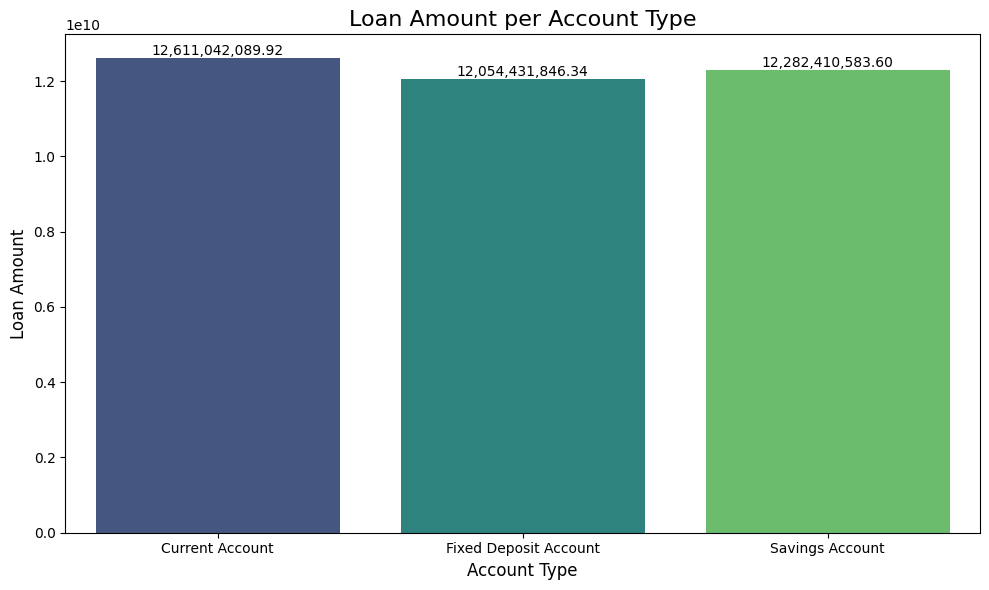

In [ ]:
# Grouping data by account type and summing balances
data_com_talo = data_com.groupby('account_type')['loan_amount'].sum().reset_index()

# Creating a bar chart using Seaborn
plt.figure(figsize=(10, 6))
sns.barplot(data=data_com_talo, x='account_type', y='loan_amount', hue='account_type', dodge=False, palette='viridis', legend=False)

# Adding numerical values on top of each bar
for i in range(len(data_com_talo)):
    plt.text(
        x=i,
        y=data_com_talo['loan_amount'][i],
        s=f"{data_com_talo['loan_amount'][i]:,.2f}",  # Format the number
        ha='center',
        va='bottom',
        fontsize=10,
        color='black'
    )

# Adding visualization elements
plt.title('Loan Amount per Account Type', fontsize=16)
plt.xlabel('Account Type', fontsize=12)
plt.ylabel('Loan Amount', fontsize=12)
plt.xticks(rotation=0)
plt.tight_layout()

# Displaying the plot
plt.show()

In [ ]:
data_com_talo

,account_type,loan_amount
0,Current Account,1.261104e+10
1,Fixed Deposit Account,1.205443e+10
2,Savings Account,1.228241e+10


The data shows the loan amounts for three account types. The Current Account has a loan amount of approximately 12.61 billion, the Fixed Deposit Account has a loan amount of about 12.05 billion, and the Savings Account has a loan amount of around 12.28 billion.

## TYPE ACCOUNT AND LOAN TERM MONTHS

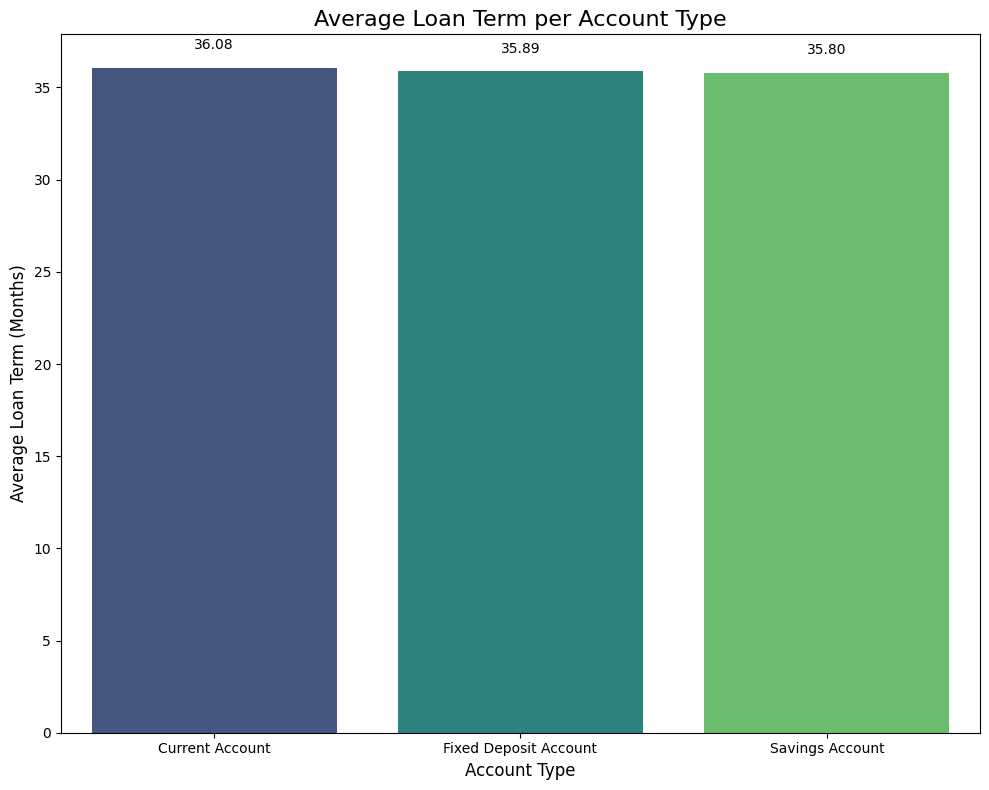

In [ ]:
# Grouping by account type and calculating mean loan term
data_com_taltm = data_com.groupby('account_type')['loan_term_months'].mean().reset_index()

# Creating the bar plot
plt.figure(figsize=(10, 8))
bar_plot = sns.barplot(data=data_com_taltm, x='account_type', y='loan_term_months', hue='account_type', dodge=False, palette='viridis', legend=False)

# Adding numerical values on top of each bar
for index, row in data_com_taltm.iterrows():
    bar_plot.text(
        x=index,
        y=row['loan_term_months'] + 1,  # Slightly above the bar
        s=f"{row['loan_term_months']:.2f}",  # Format the number to two decimal places
        ha='center',
        fontsize=10,
        color='black'
    )

# Adding visualization elements
plt.title('Average Loan Term per Account Type', fontsize=16)
plt.xlabel('Account Type', fontsize=12)
plt.ylabel('Average Loan Term (Months)', fontsize=12)
plt.xticks(rotation=0)
plt.tight_layout()

# Displaying the plot
plt.show()

In [ ]:
data_com_taltm

,account_type,loan_term_months
0,Current Account,36.079604
1,Fixed Deposit Account,35.886243
2,Savings Account,35.797541


The data shows the loan terms in months for three account types. The Current Account has an average loan term of approximately 36.08 months, the Fixed Deposit Account has a loan term of about 35.89 months, and the Savings Account has a loan term of around 35.80 months.

# CONCLUSION

1. **Balance**:
  - Fixed Deposit Account: 1.27 trillion
  - Current Account: 1.27 trillion
  - Saving Accounts: 1.22 trillion

  Balance:  Fixed Deposit Account and Current Account has the largest balance, followed by the Saving Accounts.

2. **Transactions Amount**:

  - Fixed Deposit Account: 80.13 billion
  - Current Account: 4.14 billion
  - Savings Account: 8.33 billion

  Transaction Amount: The Fixed Deposit Account has the largest transaction amount, followed by the Current Account and Savings Account.

3. **Transactions Type**:

  - Fixed Deposit Account: 788 deposits, 0 transfers, 809 withdrawals
  - Savings Account: 809 deposits, 0 transfers, 810 withdrawals
  - Current Account: 553 deposits, 568 transfers, 524 withdrawals

  Transactions Type:
  The Fixed Deposit Account recorded high deposit amounts.
  The Savings Account had slightly more withdrawals compared to other account types.

4. **Loans**:

  - Fixed Deposit Account: 12.05 billion
  - Current Account: 12.61 billion
  - Savings Account: 12.28 billion

  Loans: All three account types have similar loan amounts.

5. **Loan Terms**:

  - Fixed Deposit Account: 35.89 months
  - Current Account: 36.08 months
  - Savings Account: 35.80 months

  Loan Terms: The loan terms are almost the same across all account types.

#BUSINESS SUGGESTIONS

1. **Fixed Deposit Account: Optimize Savings Value**

  - Increase Deposits Strategy: Considering that Fixed Deposit has the largest balance and transaction amount, introduce incentives such as competitive interest rates or loyalty programs for customers increasing their deposits.

  - Promote Long-Term Investment: Leverage the high transaction value of Fixed Deposit by creating educational campaigns to highlight the benefits of long-term investment through this account type.

2. **Current Account: Enhance Transactions and Engagement**

  - Focus on Transfer Facilities: With a significant number of transfers, strengthen digital banking services to improve transfer convenience, such as reduced fees for specific customers.

  - Promote Business Packages: As this account type is often used for operational needs, create special packages for SMEs featuring services like bulk payment options or integration with financial management tools.

3. **Savings Account: Increase Savings Appeal**

  - Customer Loyalty Program: With higher withdrawal activity compared to other account types, introduce loyalty programs to reduce excessive withdrawals, such as rewards for maintaining stable balances.

  - Planned Savings Products: Launch structured savings plans with rewards for customers who make regular deposits over a set period, encouraging better saving habits.

4. **Loans: Diversify Offerings**

  - Account-Based Loan Products: Since loans are evenly distributed across all account types, develop loan products linked to specific accounts. For instance, investment loans for Fixed Deposit holders or unsecured loans for Savings Account customers.

  - Personalized Loan Terms: Although loan durations are similar, offer flexibility for customers to tailor loan terms to their needs with competitive interest rates.

5. **Digitalization and Cross-Selling**

  - Enhance Digital Services: Improve online services for all account types, enabling customers to manage transactions, loans, and investments conveniently.

  - Cross-Selling Strategy: Encourage customers to hold multiple account types. For example, Savings Account customers could be offered Fixed Deposit or Current Account options with special incentives.

6. **Focus on Financial Education**

  - Customer Education: Organize seminars or online content explaining the benefits of banking products and how customers can utilize their accounts to achieve financial goals.

7. **Operational Cost Optimization**

  - Further analyze why transaction amounts for Savings Account and Current Account are relatively small compared to Fixed Deposit. Conduct an audit to ensure the transaction fee structure remains competitive, particularly for business and individual customers.

**Next Steps**

These recommendations focus on optimizing customer relationships, increasing engagement through relevant products, and supporting business growth through service innovation.

In [ ]:
data_com.to_csv('data_com_clean.csv', index=False)